# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [6]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [8]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4191,3919,7/12/2012,Khiladi 786,"$5,600,000","$14,683,763","$385,422"
2307,289,10/12/2004,Ocean's Twelve,"$110,000,000","$362,989,076","$125,531,634"
4584,5173,3/28/2014,Locker 13,"$300,000","$3,496","$3,496"
735,924,9/12/1994,Disclosure,"$55,000,000","$212,200,000","$83,015,089"
2261,356,7/23/2004,Catwoman,"$100,000,000","$82,145,379","$40,202,379"


In [9]:
# Checking for NaN values
# data.any().isna()
data.isna().values.any()


np.False_

In [10]:
# Checking for duplicates
# duplicates = data[data.duplicated(subset=['Movie_Title'])] # Movies may have same titles 
print(data.duplicated().values.any())
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

False


0

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
# My Approach
# data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(r'[$,]', '', regex=True)
# data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
# data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(r'[$,]', '', regex=True)
# data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
# data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(r'[$,]', '', regex=True)
# data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

# Course Approach
# chars_to_remove = [',', '$']
# columns_to_clean = ['USD_Production_Budget', 
#                     'USD_Worldwide_Gross',
#                     'USD_Domestic_Gross']
 
# for col in columns_to_clean:
#     for char in chars_to_remove:
#         # Replace each character with an empty string
#         data[col] = data[col].astype(str).str.replace(char, "")
#     # Convert column to a numeric data type
#     data[col] = pd.to_numeric(data[col])

# Imporvised approach
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(r'[$,]', '', regex=True)
    data[col] = pd.to_numeric(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [12]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [13]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [14]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [15]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [16]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [17]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [18]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

future_releases = data[data.Release_Date>=scrape_date]
print(f'Number of unrelesed movies {len(future_releases)}')
future_releases

Number of unrelesed movies 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [19]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [20]:
# money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
# len(money_losing)/len(data_clean)

money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross + USD_Domestic_Gross')
money_losing.shape[0]/data_clean.shape[0] * 100

28.10178306092125

In [21]:
# Calculate profitability
data_clean['Profitability'] = (data_clean['USD_Worldwide_Gross'] + data_clean['USD_Domestic_Gross']) - data_clean['USD_Production_Budget']

# Sort values by the Profitability column in descending order
data_clean = data_clean.sort_values(by='Profitability', ascending=False)
data_clean.head(15)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,3119426607
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2689324450
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2666287970
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,2108838603
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547,1917759094
4844,59,2015-03-04,Furious 7,190000000,1516748684,351032910,1677781594
4789,10,2015-01-05,Avengers: Age of Ultron,250000000,1404705868,459005868,1613711736
5330,115,2017-03-17,Beauty and the Beast,160000000,1260122363,504014165,1604136528
3925,231,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,1341511219,381011219,1597522438
4497,134,2013-11-22,Frozen,150000000,1274234980,400738009,1524972989


In [22]:
data_clean['Profit_percentage'] = np.where(
    data_clean['USD_Production_Budget'] == 0,
    np.nan,  # Replace with NaN or a default value
    ((data_clean['USD_Worldwide_Gross'] + data_clean['USD_Domestic_Gross'] - data_clean['USD_Production_Budget']) / data_clean['USD_Production_Budget']) * 100
)


data_clean = data_clean.sort_values(by='Profit_percentage', ascending=False)

data_clean.head(10)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability,Profit_percentage
175,5356,1972-06-30,Deep Throat,25000,45000000,45000000,89975000,"359,900.00"
3476,5110,2009-09-25,Paranormal Activity,450000,194183034,107918810,301651844,"67,033.74"
1268,5026,1999-07-14,The Blair Witch Project,600000,248300000,140539099,388239099,"64,706.52"
5025,5295,2015-10-07,The Gallows,100000,41753881,22764410,64418291,"64,418.29"
668,5383,1993-02-26,El Mariachi,7000,2041928,2040920,4075848,"58,226.40"
270,5229,1980-03-21,Mad Max,200000,99750000,8750000,108300000,"54,150.00"
2255,5323,2004-07-05,Super Size Me,65000,22233808,11529368,33698176,"51,843.35"
28,4969,1942-08-13,Bambi,858000,268000000,102797000,369939000,"43,116.43"
802,5329,1995-09-08,The Brothers McMullen,50000,10426506,10426506,20803012,"41,606.02"
190,5280,1974-10-18,The Texas Chainsaw Massacre,140000,26572439,26572439,53004878,"37,860.63"


In [23]:
total_losses = data_clean[data_clean.Profit_percentage==-100.00]
total_losses[total_losses.USD_Production_Budget==total_losses.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability,Profit_percentage
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000,-100.00
5338,879,2017-04-08,The Dark Tower,60000000,0,0,-60000000,-100.00


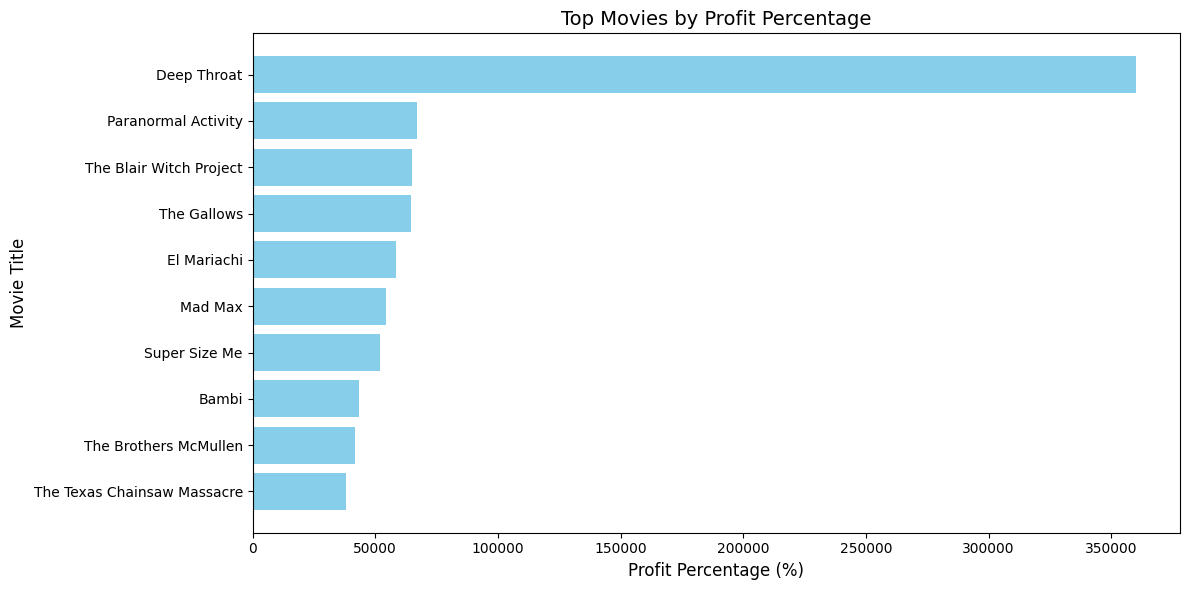

In [24]:
data = {
    "Rank": [175, 3476, 1268, 5025, 668, 270, 2255, 28, 802, 190],
    "Movie_Title": [
        "Deep Throat", "Paranormal Activity", "The Blair Witch Project",
        "The Gallows", "El Mariachi", "Mad Max", "Super Size Me", "Bambi",
        "The Brothers McMullen", "The Texas Chainsaw Massacre"
    ],
    "Profit_percentage": [360000.00, 67133.74, 64806.52, 64518.29, 58326.40, 54250.00, 51943.35, 43216.43, 41706.02, 37960.63]
}

df = pd.DataFrame(data)


plt.figure(figsize=(12, 6))
plt.barh(df["Movie_Title"], df["Profit_percentage"], color='skyblue')
plt.xlabel("Profit Percentage (%)", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.title("Top Movies by Profit Percentage", fontsize=14)
plt.gca().invert_yaxis()  # To have the highest percentage on top
plt.tight_layout()
plt.show()


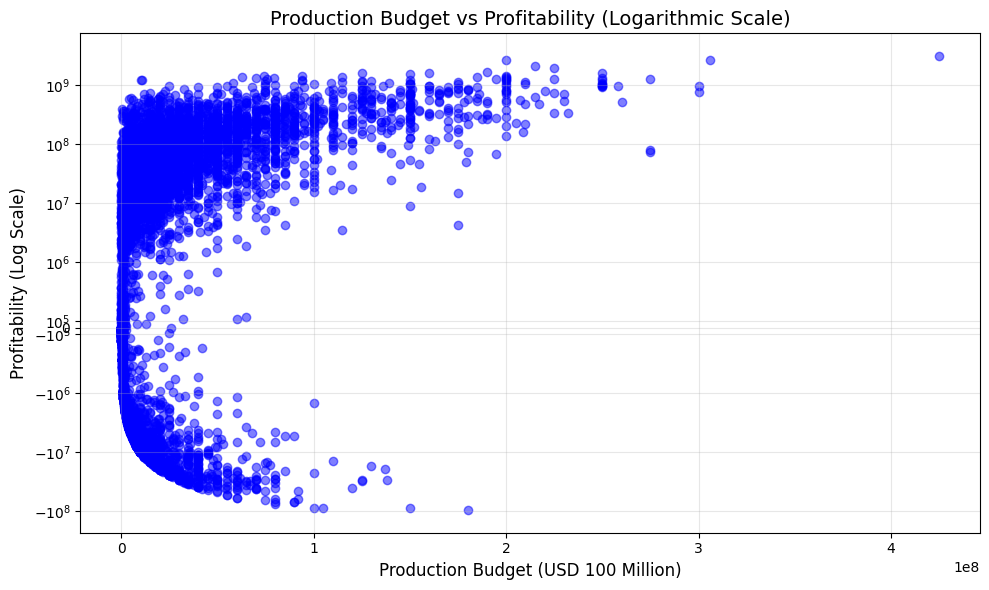

In [25]:
# Scatter plot with a logarithmic scale for the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['USD_Production_Budget'], data_clean['Profitability'], 
            color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel("Production Budget (USD 100 Million)", fontsize=12)
plt.ylabel("Profitability (Log Scale)", fontsize=12)
plt.title("Production Budget vs Profitability (Logarithmic Scale)", fontsize=14)

# Use a logarithmic scale for the y-axis
plt.yscale('symlog', linthresh=1e6)  # Linear near zero, log for large values

# Adding grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


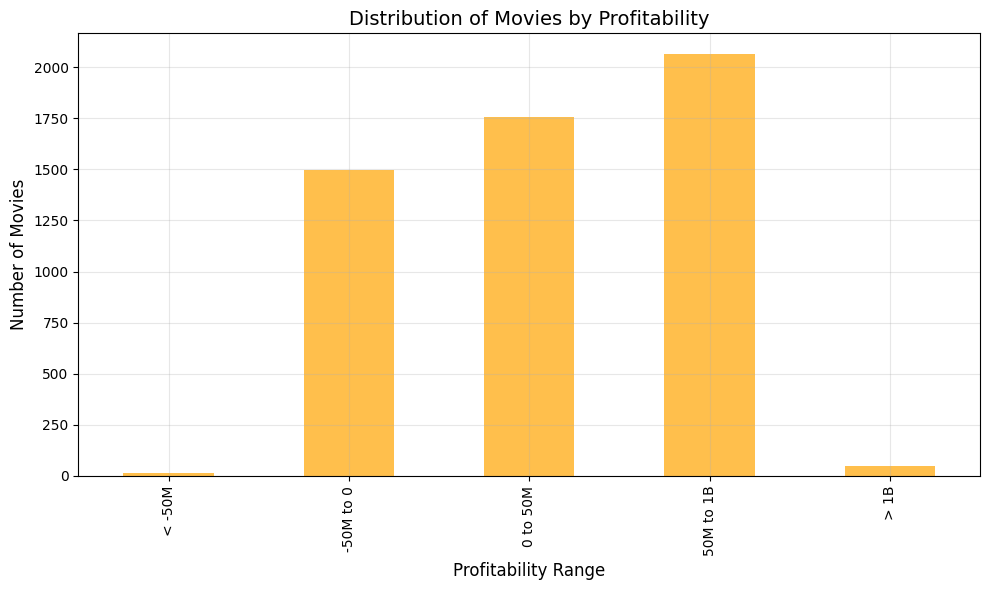

In [26]:
# Define profitability bins
bins = [-1e9, -50e6, 0, 50e6, 1e9, 2e9]  # Adjust ranges as needed
labels = ['< -50M', '-50M to 0', '0 to 50M', '50M to 1B', '> 1B']
data_clean['Profit_Bin'] = pd.cut(data_clean['Profitability'], bins=bins, labels=labels)

# Count movies in each bin
bin_counts = data_clean['Profit_Bin'].value_counts().sort_index()

# Plot the binned data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel("Profitability Range", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movies by Profitability", fontsize=14)

# Adding grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


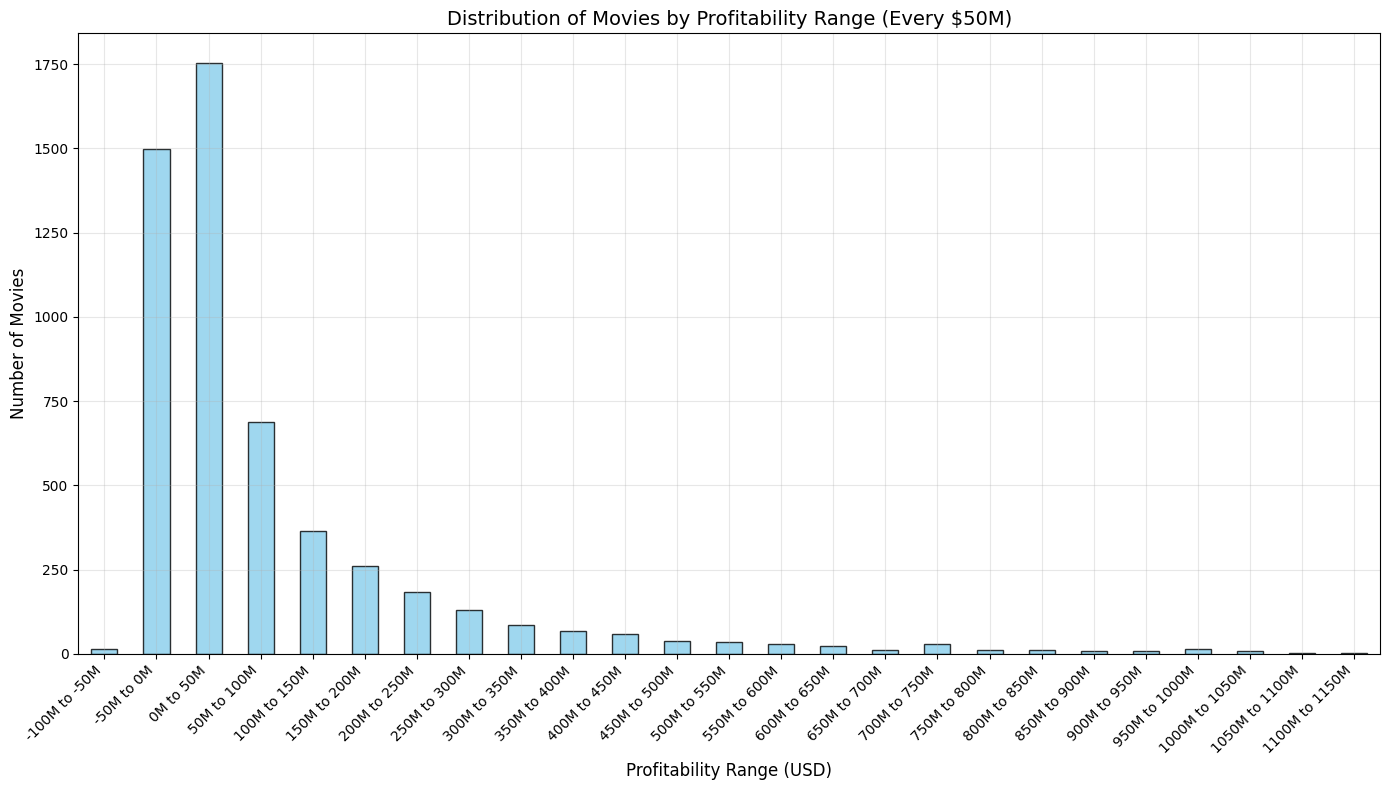

In [27]:
# Define bin edges: Start from a large negative value to a large positive value, in $100 million increments
bin_edges = np.arange(-1e8,1.2e9, 5e7)  # Bins every $100 million from -1 billion to 2 billion
labels = [f"{int(bin_edges[i] / 1e6)}M to {int(bin_edges[i+1] / 1e6)}M" for i in range(len(bin_edges)-1)]

# Assign movies to bins
data_clean['Profit_Bin'] = pd.cut(data_clean['Profitability'], bins=bin_edges, labels=labels)

# Count movies in each bin
bin_counts = data_clean['Profit_Bin'].value_counts().sort_index()

# Plot the binned data
plt.figure(figsize=(14, 8))
bin_counts.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')

# Add labels and title
plt.xlabel("Profitability Range (USD)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movies by Profitability Range (Every $50M)", fontsize=14)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


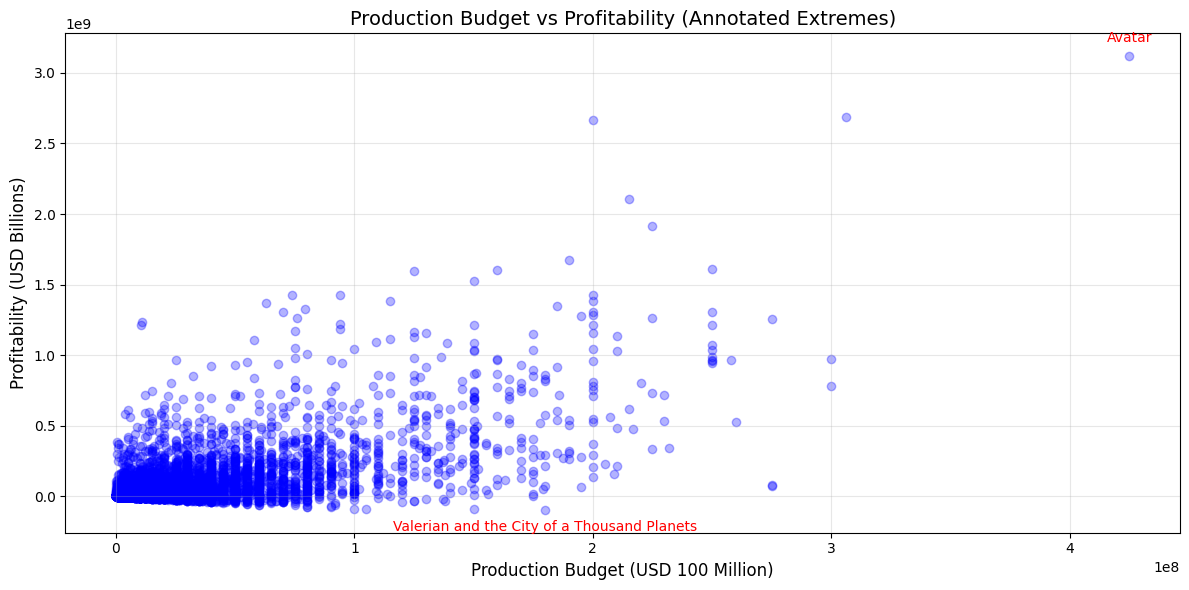

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(data_clean['USD_Production_Budget'], data_clean['Profitability'], 
            color='blue', alpha=0.3)

# Annotate top profitability
top_movie = data_clean.loc[data_clean['Profitability'].idxmax()]
plt.annotate(top_movie['Movie_Title'], 
             (top_movie['USD_Production_Budget'], top_movie['Profitability']),
             textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Annotate lowest profitability
low_movie = data_clean.loc[data_clean['Profitability'].idxmin()]
plt.annotate(low_movie['Movie_Title'], 
             (low_movie['USD_Production_Budget'], low_movie['Profitability']),
             textcoords="offset points", xytext=(0, -15), ha='center', color='red')

# Adding labels and title
plt.xlabel("Production Budget (USD 100 Million)", fontsize=12)
plt.ylabel("Profitability (USD Billions)", fontsize=12)
plt.title("Production Budget vs Profitability (Annotated Extremes)", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


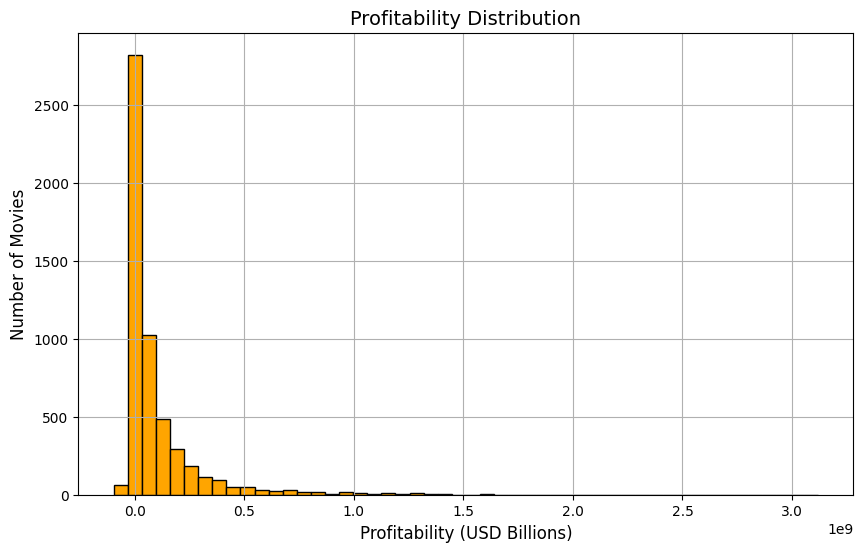

In [29]:
# Plot the profitability distribution
plt.figure(figsize=(10, 6))
plt.hist(data_clean['Profitability'], bins=50, color='orange', edgecolor='black')
plt.title('Profitability Distribution', fontsize=14)
plt.xlabel('Profitability (USD Billions)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True)
plt.show()


# Seaborn for Data Viz: Bubble Charts

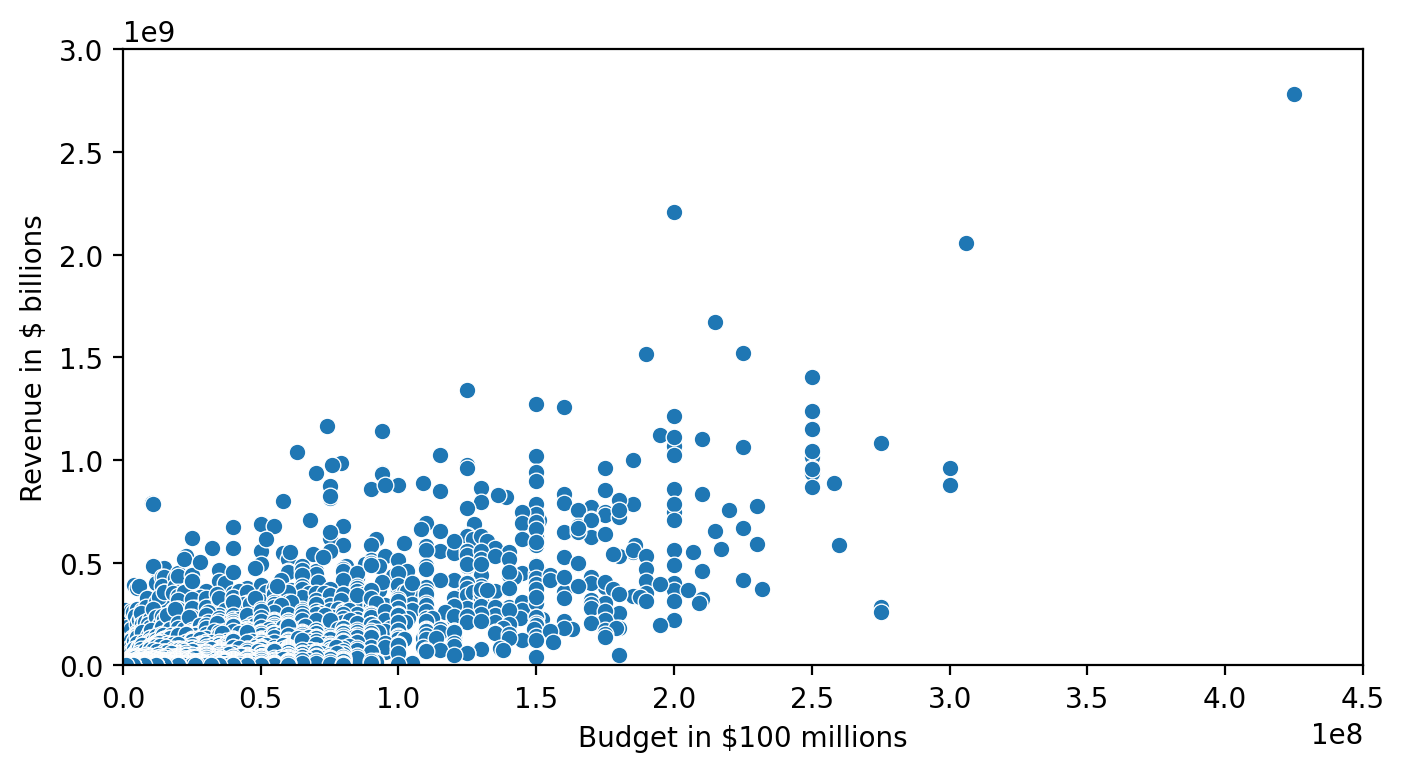

In [30]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



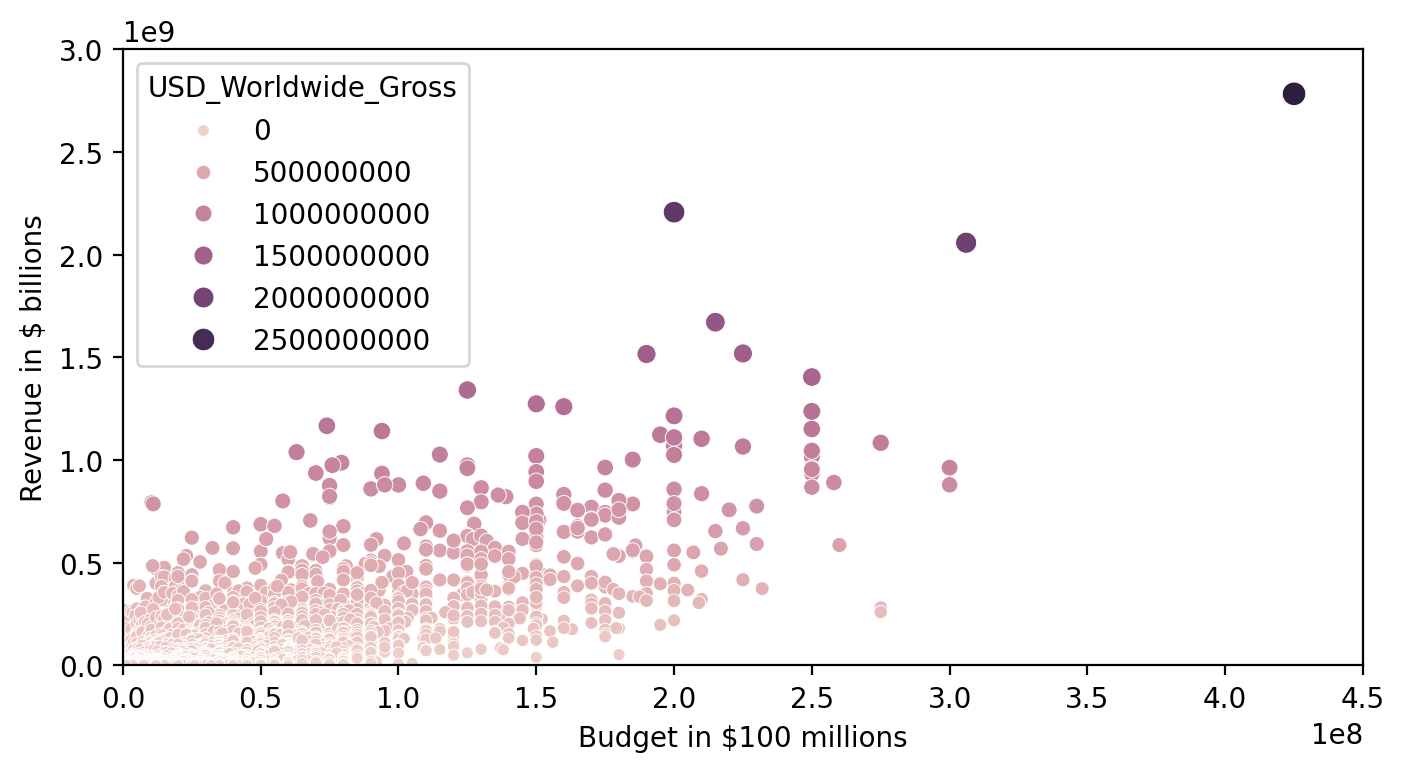

In [31]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

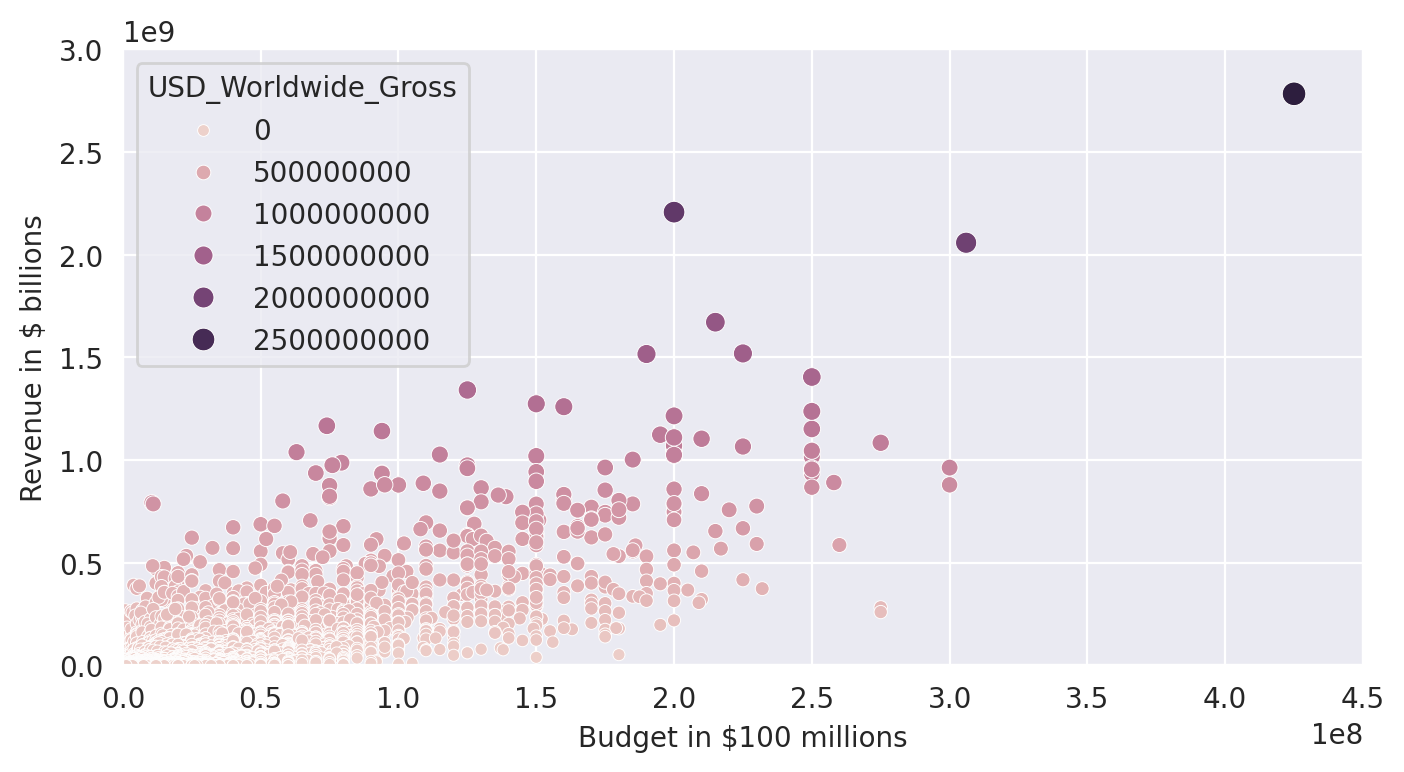

In [32]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

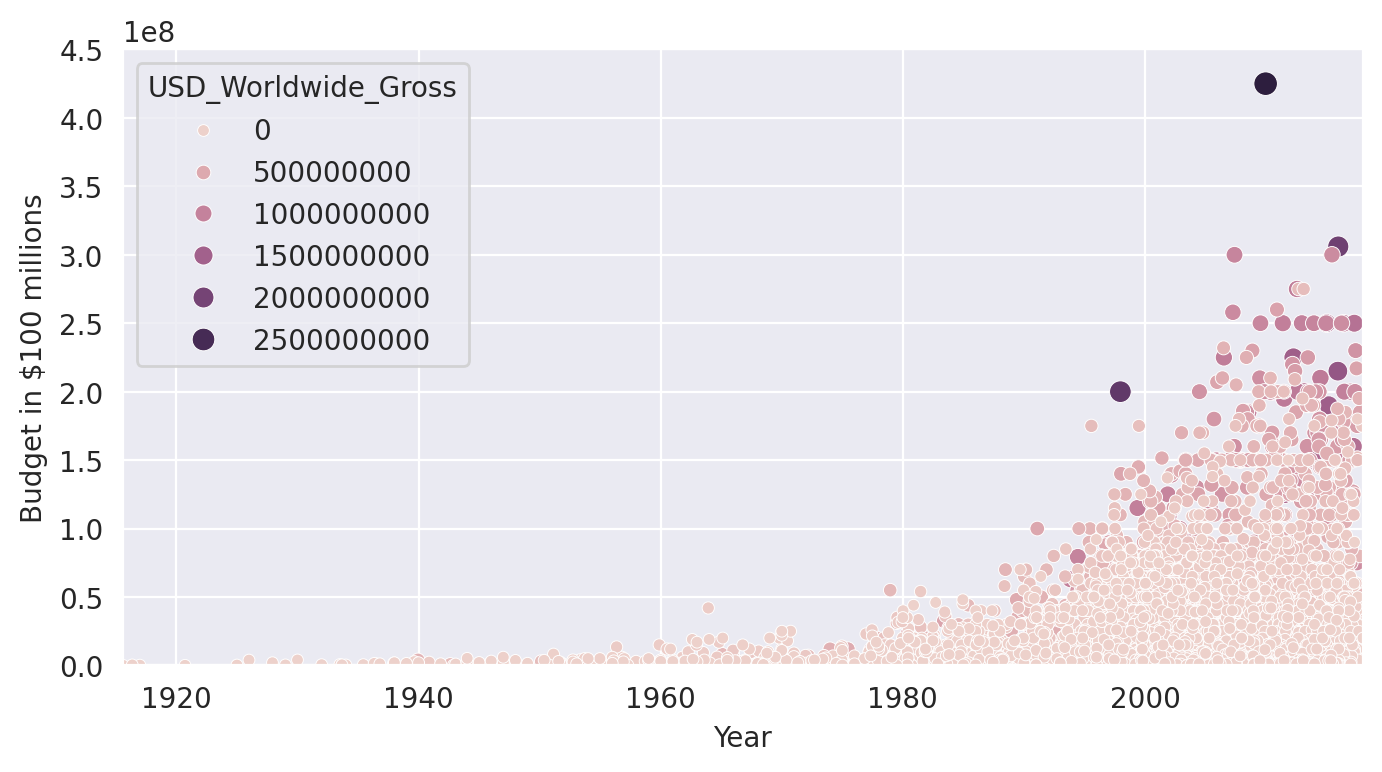

In [33]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [34]:
years = pd.DatetimeIndex(data=data_clean.Release_Date).year
decades = years//10*10
data_clean['Decade'] = decades
data_clean.sort_index()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability,Profit_percentage,Profit_Bin,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,20890000,"18,990.91",0M to 50M,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,-100.00,-50M to 0M,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000,"7,900.00",0M to 50M,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000,"5,900.00",0M to 50M,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000,"13,369.39",0M to 50M,1920
...,...,...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,218923174,547.31,200M to 250M,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,544190539,294.16,500M to 550M,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,4187674,2.39,0M to 50M,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,61700686,146.91,50M to 100M,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [35]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [36]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability,Profit_percentage,Decade
count,153.00,153,153.00,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","48,197,810.60","2,417.95","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"-9,500,000.00",-100.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","6,800,000.00",308.30,"1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","17,000,000.00",747.15,"1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","52,800,000.00","1,788.65","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","585,305,662.00","43,116.43","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41","84,533,100.99","5,676.73",12.72


In [37]:
old_films.sort_values(by='USD_Production_Budget',ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profitability,Profit_percentage,Profit_Bin,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,86000000,204.76,50M to 100M,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,42416198,176.73,0M to 50M,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,43357556,216.79,0M to 50M,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,10946666,54.73,0M to 50M,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-4000000,-20.00,-50M to 0M,1960


# Seaborn Regression Plots

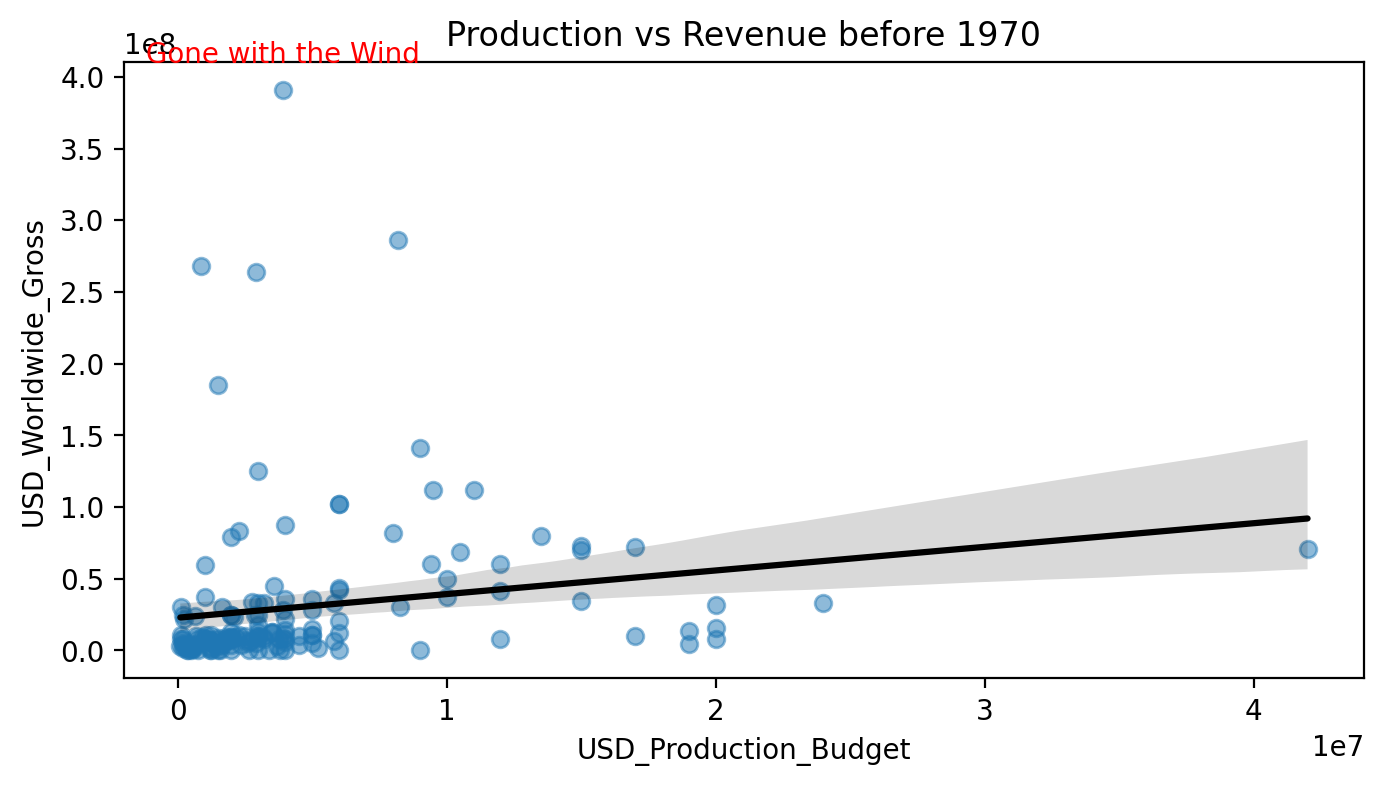

In [38]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Production vs Revenue before 1970')

with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'black'})
    
    top_movie = old_films.loc[old_films['Profitability'].idxmax()]
    
    # Correcting the annotation to use 'USD_Worldwide_Gross' for the y-coordinate
    plt.annotate(top_movie['Movie_Title'], 
                 (top_movie['USD_Production_Budget'], top_movie['USD_Worldwide_Gross']),
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')

plt.show()


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

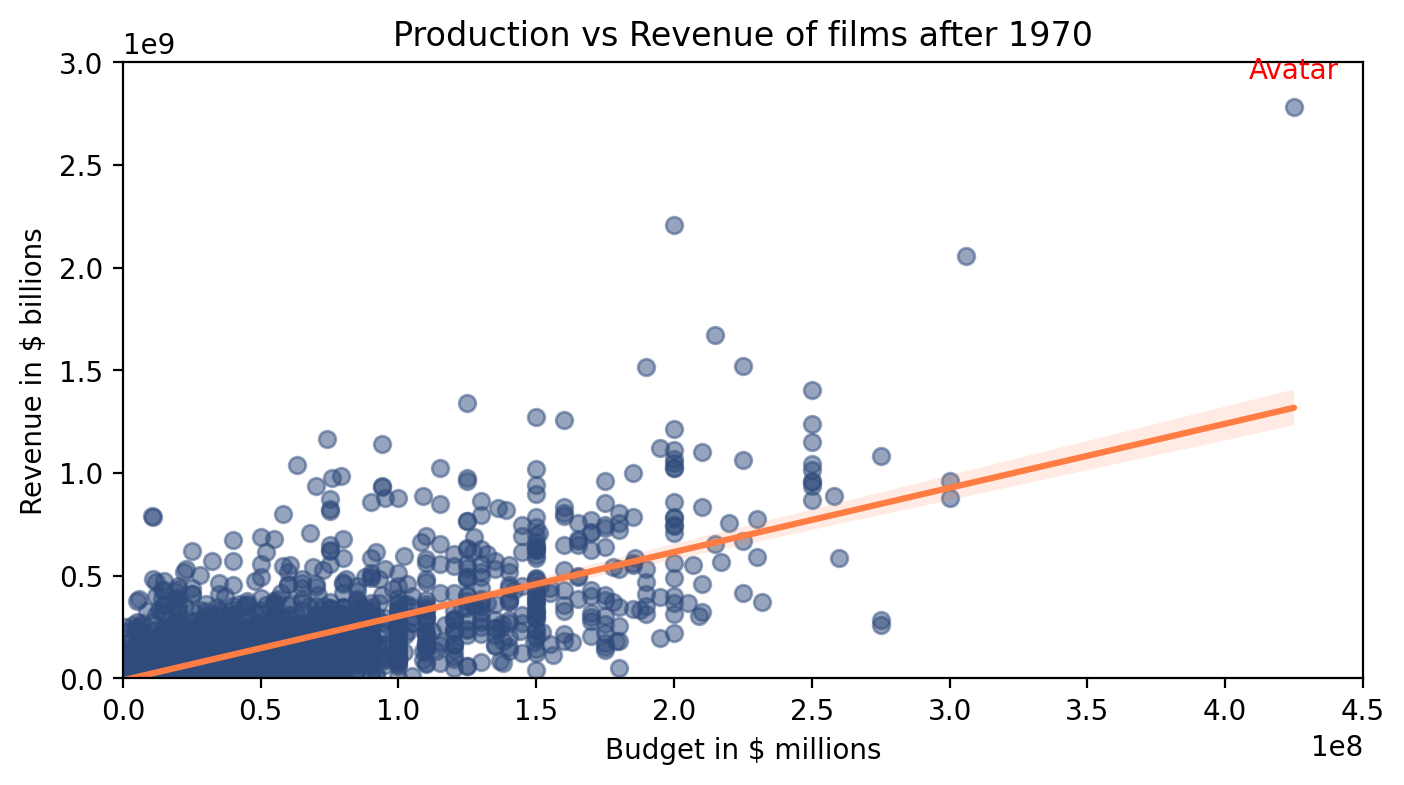

In [57]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Production vs Revenue of films after 1970')

with sns.axes_style("darkgrid"):
    sns.regplot(data=new_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.5,'color':'#2f4b7c'},
                line_kws={'color': '#ff7c43'})
    
    top_movie = new_films.loc[new_films['Profitability'].idxmax()]
    plt.xlabel('Budget in $ millions')
    plt.ylabel('Revenue in $ billions')
    plt.ylim(0,3e9)
    plt.xlim(0,4.5e8)


    
    # Correcting the annotation to use 'USD_Worldwide_Gross' for the y-coordinate
    plt.annotate(top_movie['Movie_Title'], 
                 (top_movie['USD_Production_Budget'], top_movie['USD_Worldwide_Gross']),
                 textcoords="offset points", xytext=(0, 10), ha='center', color='red')

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [69]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

regression.intercept_

regression.coef_

# R-squared
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [73]:
X = pd.DataFrame(old_films,columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)

print(f'The slope coeffecient is :{regression.coef_[0]}')

print(f'The intercept is :{regression.intercept_[0]}')

print(f'The r-squared is :{regression.score(X, y)}')


The slope coeffecient is :[1.64771314]
The intercept is :22821538.635080386
The r-squared is :0.02937258620576888


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [75]:
22821538 + 1.64771314 * 350000000

599521137.0

In [74]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
